In [23]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [24]:
df = pd.read_csv(r"C:\Users\acer\Downloads\archive(1)\Titanic-Dataset.csv")
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [37]:
Features = ["Pclass","SibSp","Parch","Fare"]
df = df[Features + ["Survived"]] 
print(df.head())


   Pclass  SibSp  Parch     Fare  Survived
0       3      1      0   7.2500         0
1       1      1      0  71.2833         1
2       3      0      0   7.9250         1
3       1      1      0  53.1000         1
4       3      0      0   8.0500         0


In [38]:
X = df[Features]
Y = df["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

In [39]:
dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 3,random_state = 42)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [41]:
Y_pred = dt.predict(X_test)
print(Y_pred)
print(f"The accuracy of the dataset is {accuracy_score(Y_test, Y_pred)}")
print(f"The classification report of the dataset is {classification_report(Y_test, Y_pred)}")
print(f"The confusion matrix of the dataset is {confusion_matrix(Y_test, Y_pred)}")

[0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0]
The accuracy of the dataset is 0.7052238805970149
The classification report of the dataset is               precision    recall  f1-score   support

           0       0.69      0.92      0.78       157
           1       0.78      0.41      0.53       111

    accuracy                           0.71       268
   macro avg       0.73      0.66      0.66       268
weighted avg       0.72      0.71      0.68       268

The confusion matrix of the datase

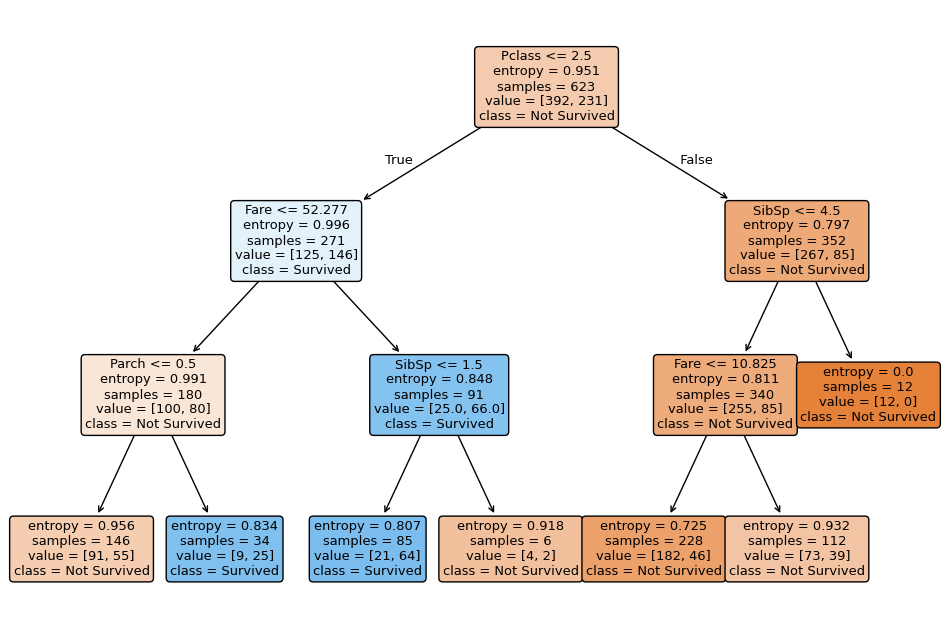

In [46]:
plt.figure(figsize=(12,8))
plot_tree(dt,feature_names = X.columns,class_names = ["Not Survived","Survived"],filled = True,rounded = True)
plt.show()